# Import Needed Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# Read Track Features Dataset

In [ ]:
df=pd.read_csv('tf_mini.csv')

# Track Features Structure

In [ ]:
#Show first 5 cells
df.head()

track_id    duration  release_year  \
0  t_a540e552-16d4-42f8-a185-232bd650ea7d  109.706673          1950   
1  t_67965da0-132b-4b1e-8a69-0ef99b32287c  187.693329          1950   
2  t_0614ecd3-a7d5-40a1-816e-156d5872a467  160.839996          1951   
3  t_070a63a0-744a-434e-9913-a97b02926a29  175.399994          1951   
4  t_d6990e17-9c31-4b01-8559-47d9ce476df1  369.600006          1951   

   us_popularity_estimate  acousticness  beat_strength  bounciness  \
0               99.975414      0.458040       0.519497    0.504949   
1               99.969430      0.916272       0.419223    0.545530   
2               99.602549      0.812884       0.425890    0.508280   
3               99.665018      0.396854       0.400934    0.359990   
4               99.991764      0.728831       0.371328    0.335115   

   danceability  dyn_range_mean    energy  ...  time_signature   valence  \
0      0.399767        7.511880  0.817709  ...               4  0.935512   
1      0.491235        9.098376  0.154258  ...               3  0.359675   
2      0.491625        8.368670  0.358813  ...               4  0.726769   
3      0.552227        5.967346  0.514585  ...               4  0.859075   
4      0.483044        5.802681  0.721442  ...               4  0.562343   

   acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  \
0          -0.033284          -0.411896          -0.028580           0.349438   
1           0.145703          -0.850372           0.123860           0.746904   
2           0.021720          -0.743634           0.333247           0.568447   
3           0.039143          -0.267555          -0.051825           0.106173   
4           0.131931          -0.292523          -0.174819          -0.034422   

  acoustic_vector_4  acoustic_vector_5  acoustic_vector_6  acoustic_vector_7  
0          0.832467          -0.213871          -0.299464          -0.675907  
1          0.371803          -0.420558          -0.213120          -0.525795  
2          0.411094          -0.187749          -0.387599          -0.433496  
3          0.614825          -0.111419          -0.265953          -0.542753  
4          0.717229          -0.016239          -0.392694          -0.455496  

[5 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  float64
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  float64
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

**We can see that most columns are numerical except for 2 columns track_id and mode**

In [ ]:
df.shape

(50704, 30)

In [ ]:
df.isna().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

**No null values were found**

In [ ]:
sum(df.duplicated())

0

**No Duplicates**

In [ ]:
df.describe()

duration  release_year  us_popularity_estimate  acousticness  \
count  50704.000000  50704.000000            50704.000000  50704.000000   
mean     222.267980   2010.324748               99.455131      0.250336   
std       72.224839     11.471866                1.139222      0.276047   
min       30.013330   1950.000000               90.018900      0.000000   
25%      183.933334   2009.000000               99.509670      0.025291   
50%      214.866669   2015.000000               99.865444      0.135821   
75%      250.426666   2017.000000               99.961131      0.406142   
max     1787.760986   2018.000000               99.999997      0.995796   

       beat_strength    bounciness  danceability  dyn_range_mean  \
count   50704.000000  50704.000000  50704.000000    50704.000000   
mean        0.492075      0.514526      0.611742        8.215950   
std         0.158102      0.182595      0.166146        2.410626   
min         0.000000      0.000000      0.000000        0.000000   
25%         0.374378      0.372463      0.502499        6.356671   
50%         0.493764      0.522266      0.625145        8.015075   
75%         0.604994      0.655912      0.736241        9.792092   
max         0.990419      0.972590      0.984952       32.342781   

             energy      flatness  ...  time_signature       valence  \
count  50704.000000  50704.000000  ...    50704.000000  50704.000000   
mean       0.641440      0.996548  ...        3.913163      0.487804   
std        0.207957      0.045611  ...        0.410036      0.246376   
min        0.000000      0.000000  ...        0.000000      0.000000   
25%        0.507839      0.975910  ...        4.000000      0.292559   
50%        0.661368      1.003790  ...        4.000000      0.478244   
75%        0.803185      1.026137  ...        4.000000      0.677947   
max        0.999877      1.103213  ...        5.000000      0.999990   

       acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  \
count       50704.000000       50704.000000       50704.000000   
mean           -0.332295           0.202193           0.153935   
std             0.416320           0.254024           0.212660   
min            -1.122792          -1.084360          -0.752231   
25%            -0.745148           0.086460           0.051604   
50%            -0.334799           0.265535           0.207705   
75%             0.045921           0.359553           0.296132   
max             0.932165           0.812837           0.605288   

       acoustic_vector_3  acoustic_vector_4  acoustic_vector_5  \
count       50704.000000       50704.000000       50704.000000   
mean           -0.040526          -0.027247           0.049475   
std             0.333129           0.377457           0.144205   
min            -0.809136          -1.029858          -0.942461   
25%            -0.294574          -0.318751          -0.038337   
50%            -0.001755          -0.176974           0.062719   
75%             0.146828           0.280852           0.160366   
max             1.074504           0.895769           0.380279   

       acoustic_vector_6  acoustic_vector_7  
count       50704.000000       50704.000000  
mean           -0.197758           0.005153  
std             0.349840           0.324259  
min            -0.736395          -0.975647  
25%            -0.444849          -0.176821  
50%            -0.298599           0.090423  
75%            -0.075158           0.194285  
max             0.966760           1.152213  

[8 rows x 28 columns]



*   Most Songs are released between 1950 and 2018.
*   Us_popularity estimate ranges from 90 to 99.
*   acousticness ranges from 0 to 0.99 ,value closer to one means that song is most likely to be an acoustic one.
*   Time signature holds values from 0 to 4 depending on how many beats are in each measure of a piece of music.
*   beat_strength	,bounciness	,danceability	,dyn_range_mean	,energy	,flatness they all have a min value equal to zero if the feature is not represented in track and varying max value according to each feature.





# Outliers

<Axes: >

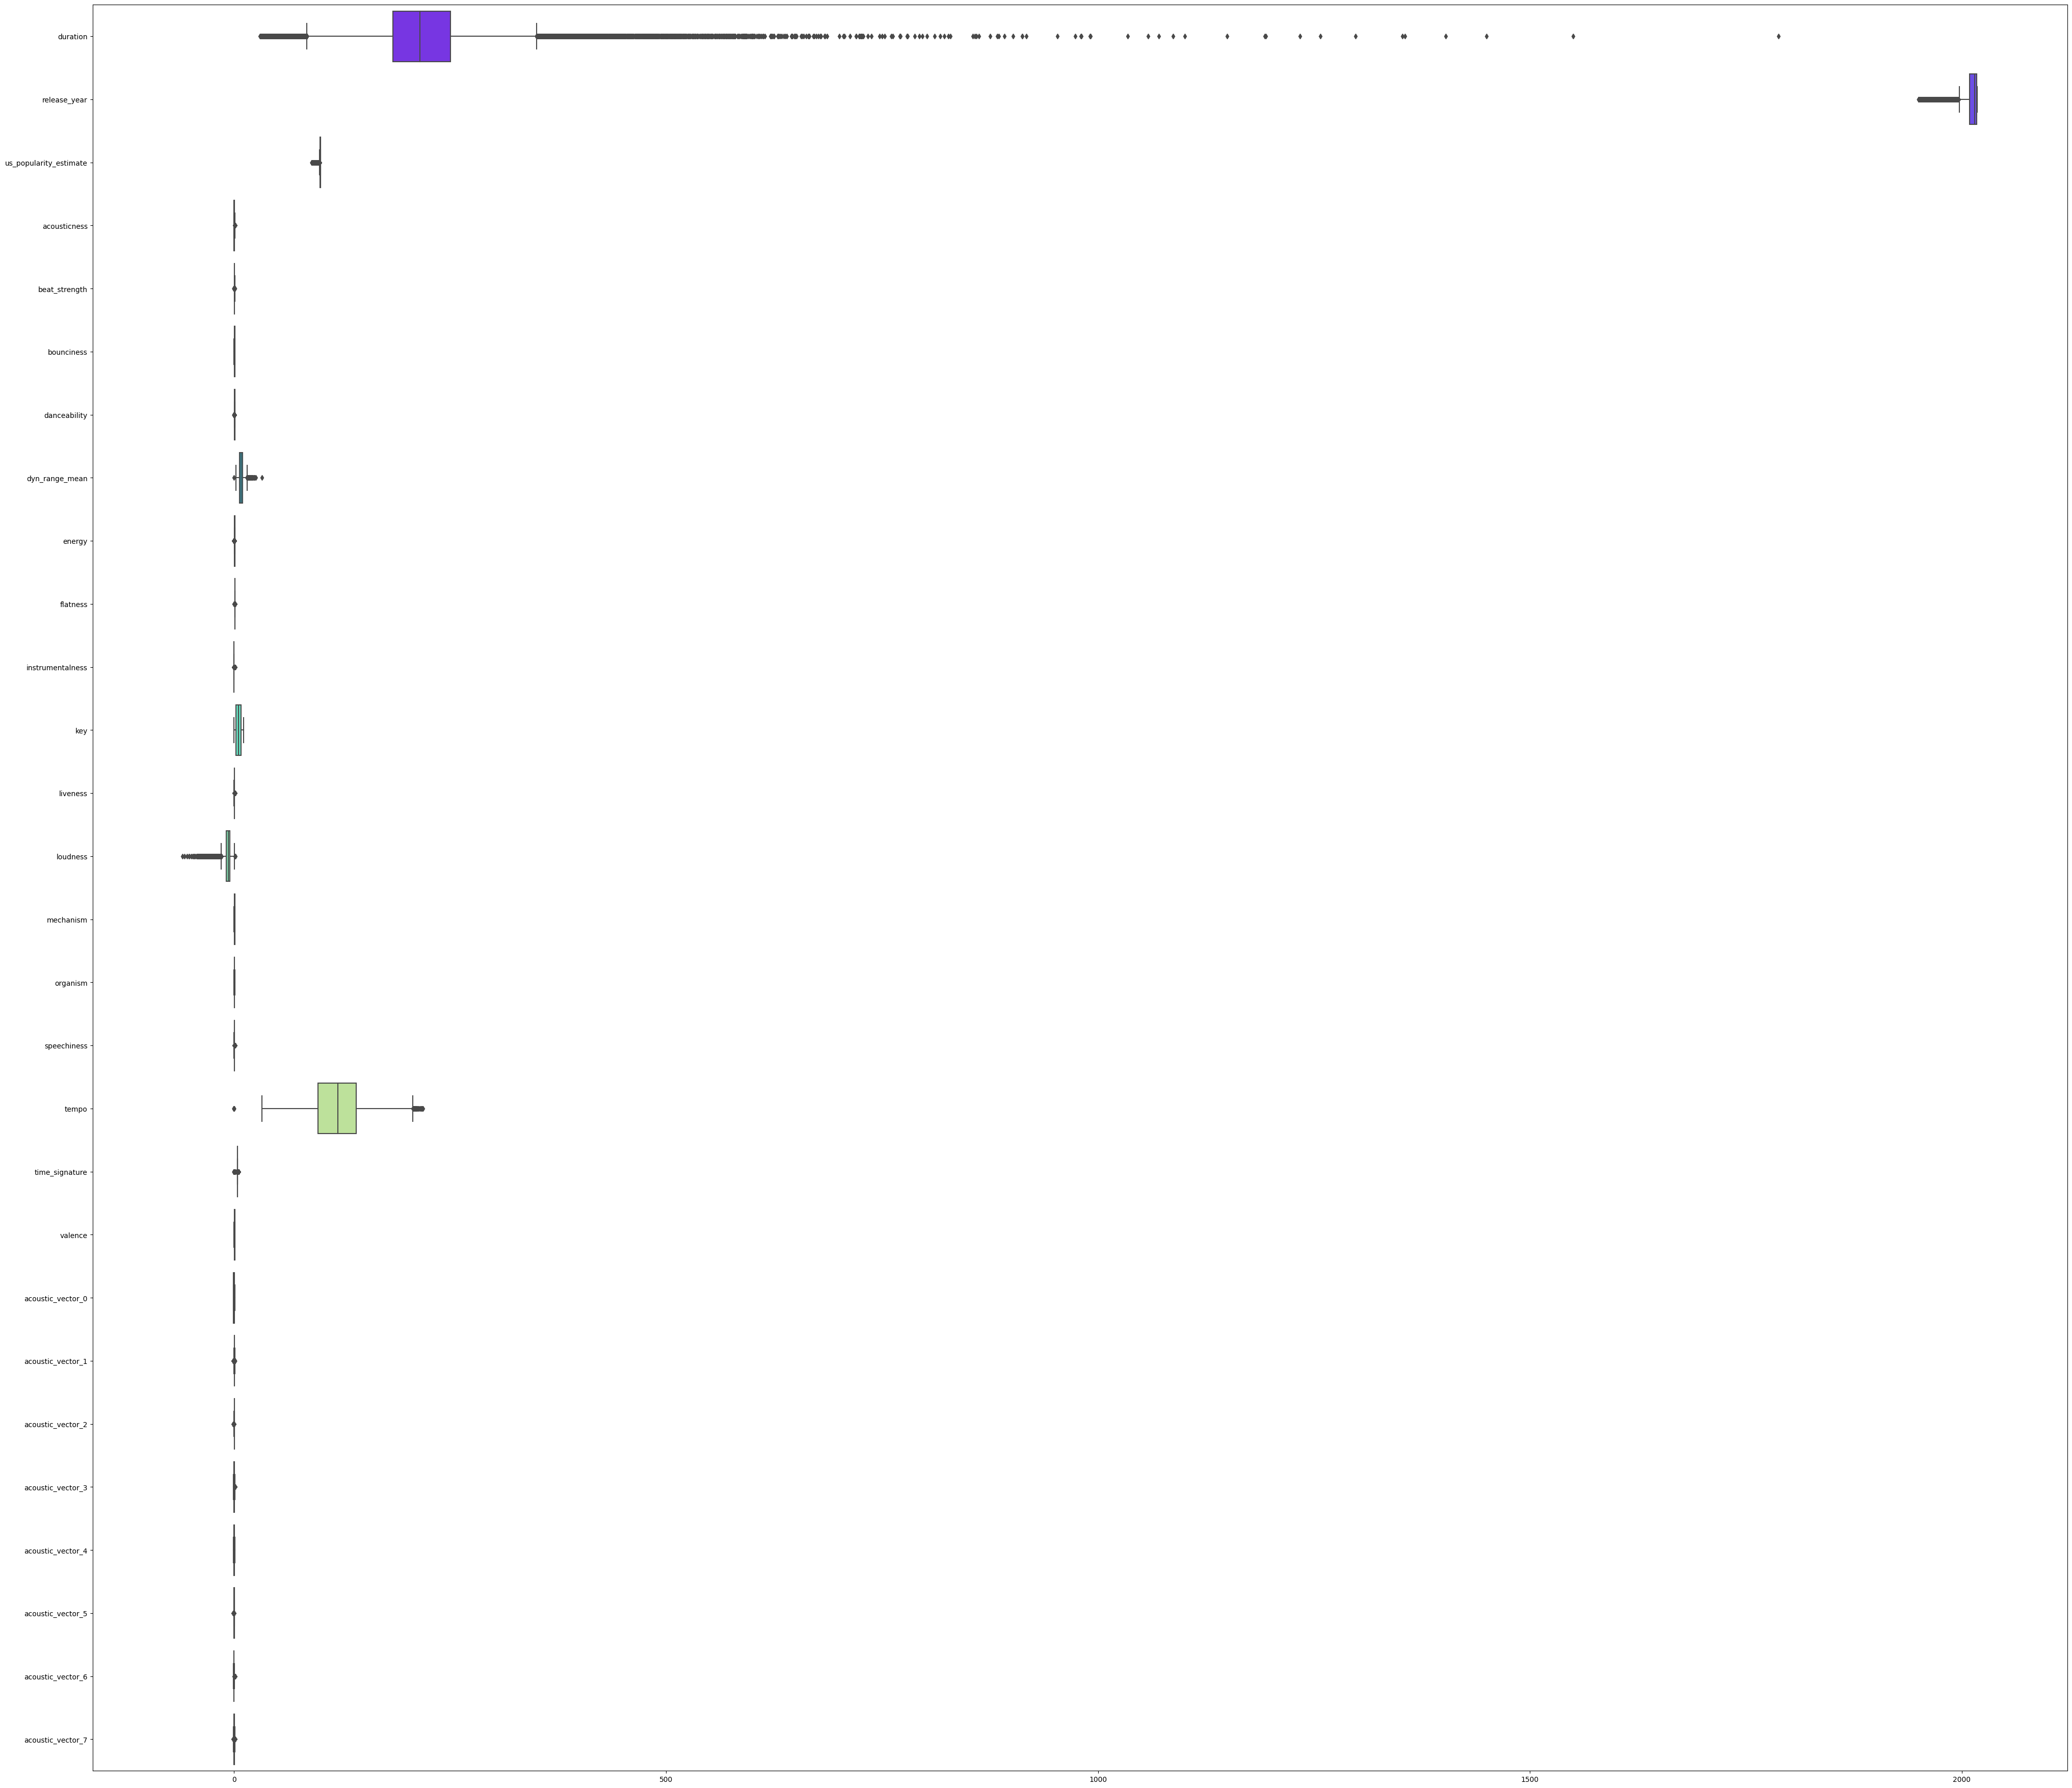

In [ ]:
plt.figure(figsize= (50,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

**Extract numerical features and removing outliers**

In [ ]:
df_numerical=df.select_dtypes(include=np.number)

In [ ]:
df_numerical=df.select_dtypes(include=np.number)
for col in df_numerical:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in duration: 2701
Number of outliers in release_year: 4955
Number of outliers in us_popularity_estimate: 5240
Number of outliers in acousticness: 911
Number of outliers in beat_strength: 18
Number of outliers in bounciness: 0
Number of outliers in danceability: 191
Number of outliers in dyn_range_mean: 224
Number of outliers in energy: 130
Number of outliers in flatness: 1061
Number of outliers in instrumentalness: 7688
Number of outliers in key: 0
Number of outliers in liveness: 1654
Number of outliers in loudness: 652
Number of outliers in mechanism: 0
Number of outliers in organism: 34
Number of outliers in speechiness: 689
Number of outliers in tempo: 7
Number of outliers in time_signature: 2193
Number of outliers in valence: 0
Number of outliers in acoustic_vector_0: 0
Number of outliers in acoustic_vector_1: 1322
Number of outliers in acoustic_vector_2: 1363
Number of outliers in acoustic_vector_3: 288
Number of outliers in acoustic_vector_4: 1489
Number of out

# What Features play a role in deciding whether a song is popular or not ?

**Let's Create a scatter plot with us_popularity_estimate on y-axis and other track features on x-axis**

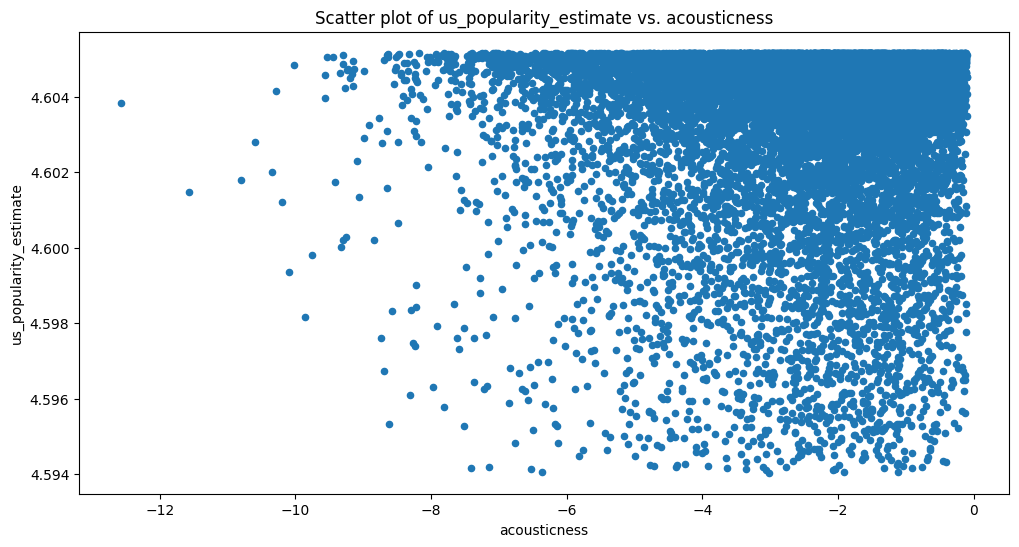

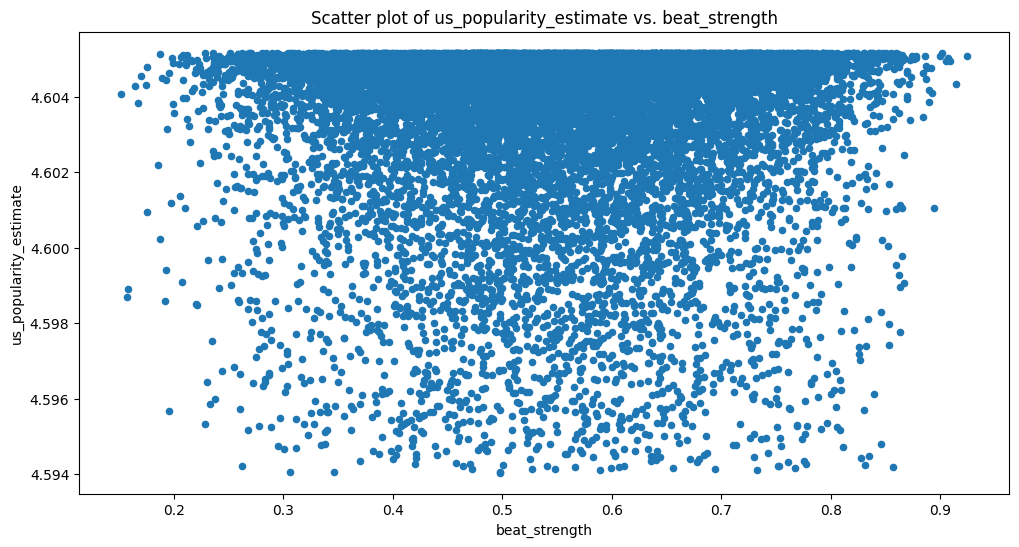

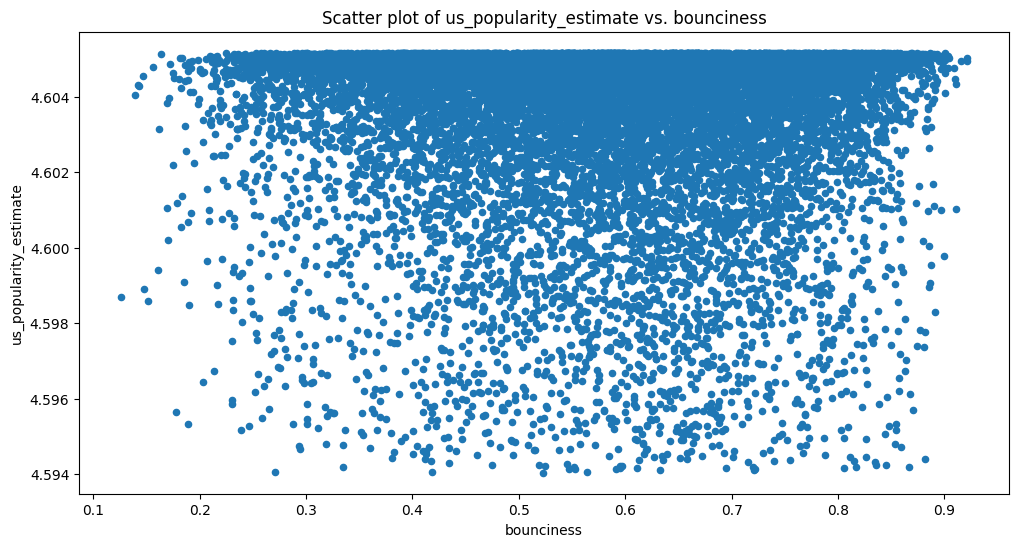

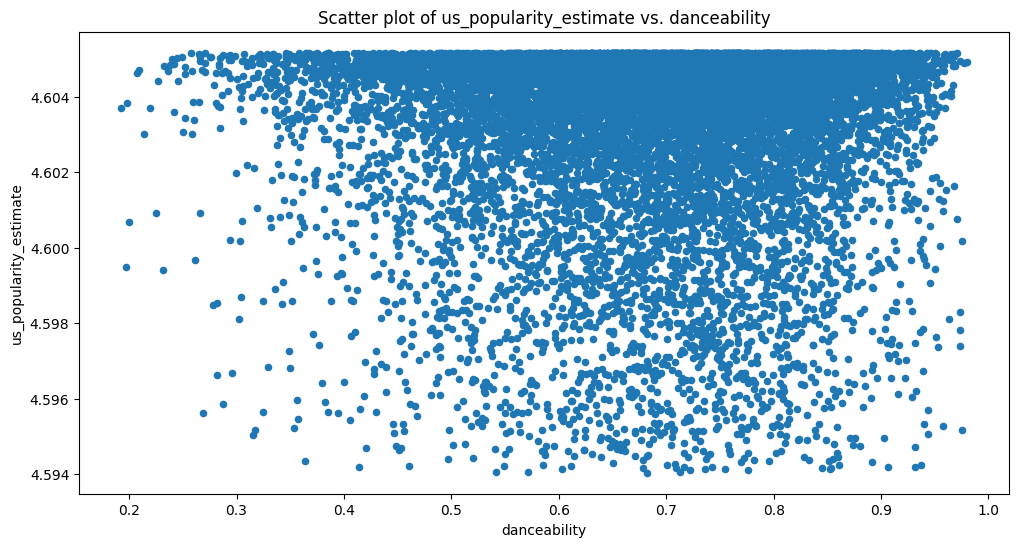

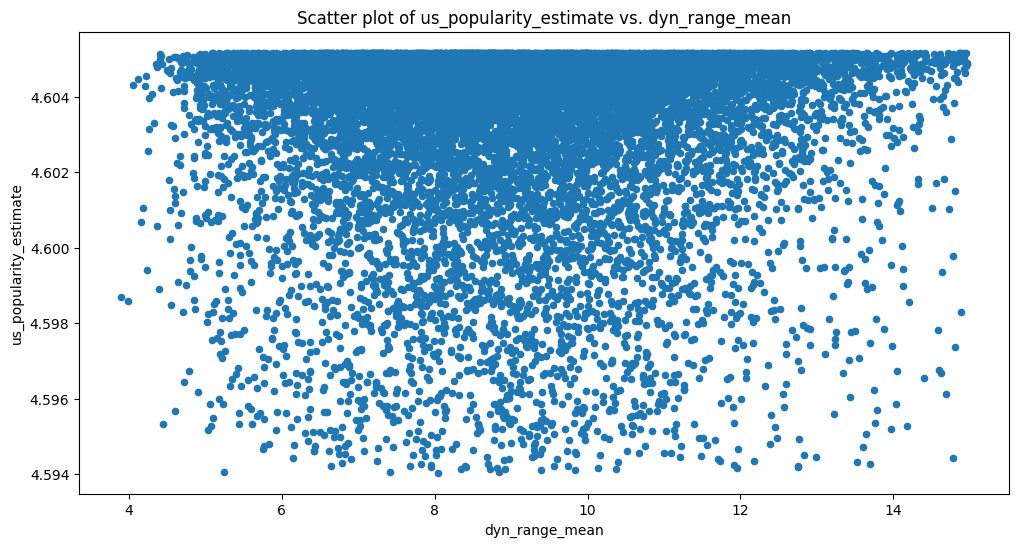

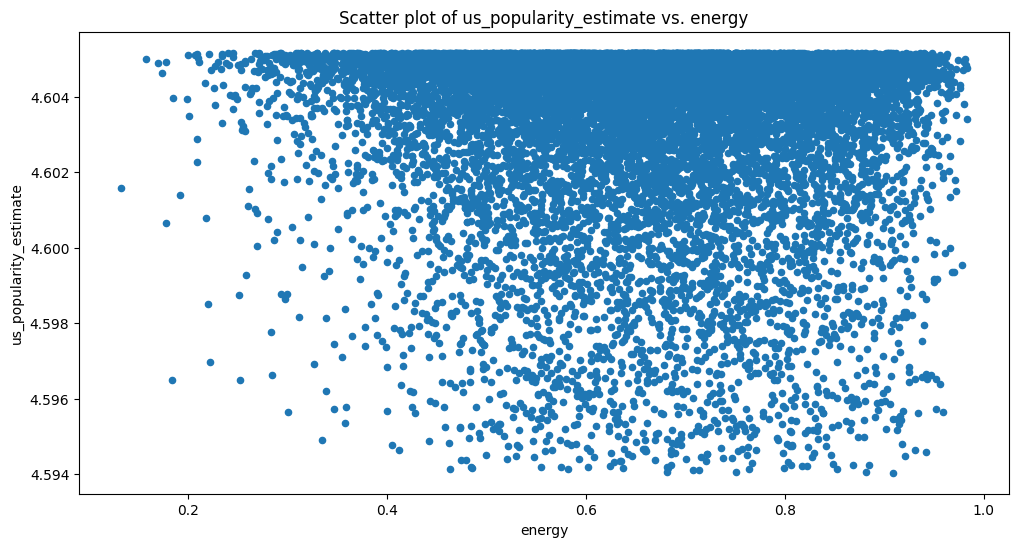

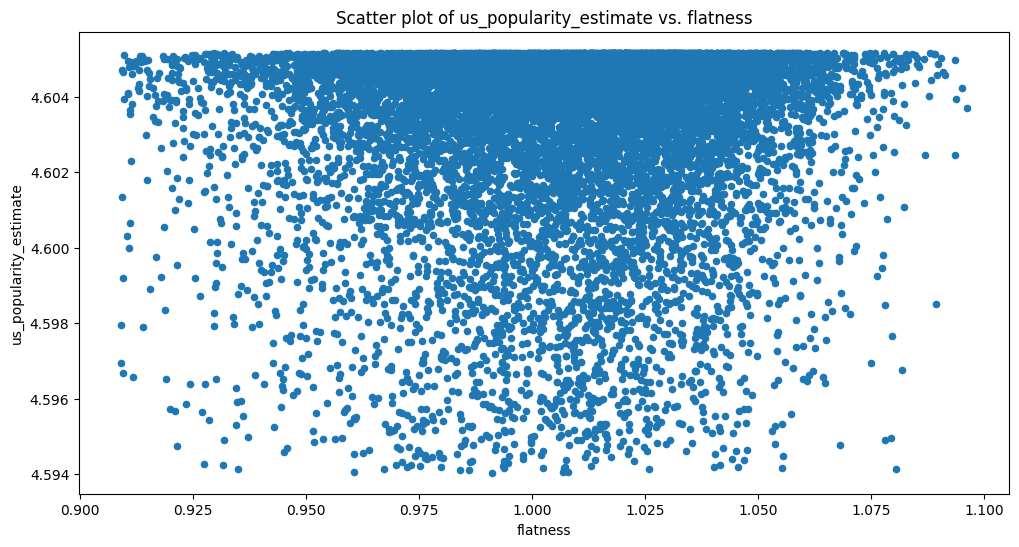

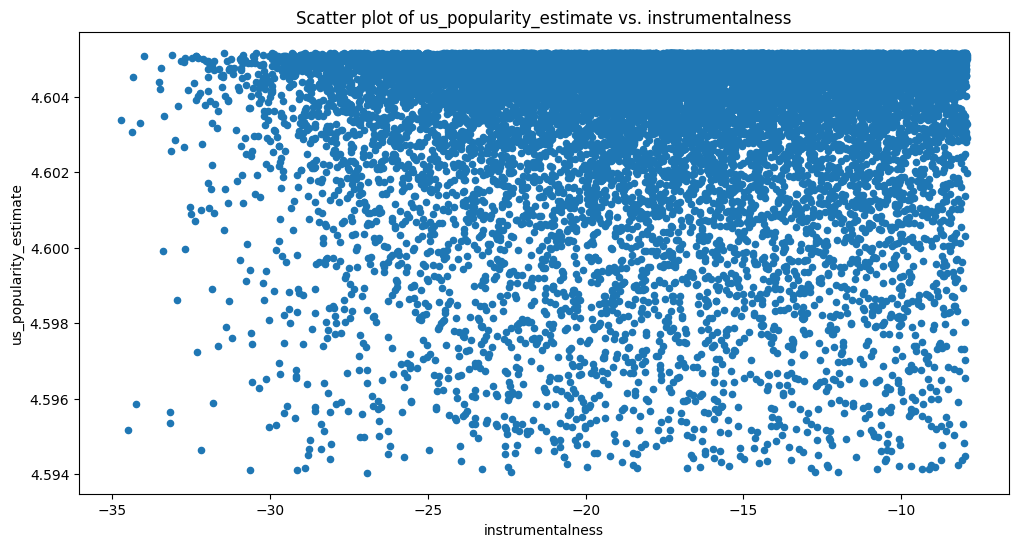

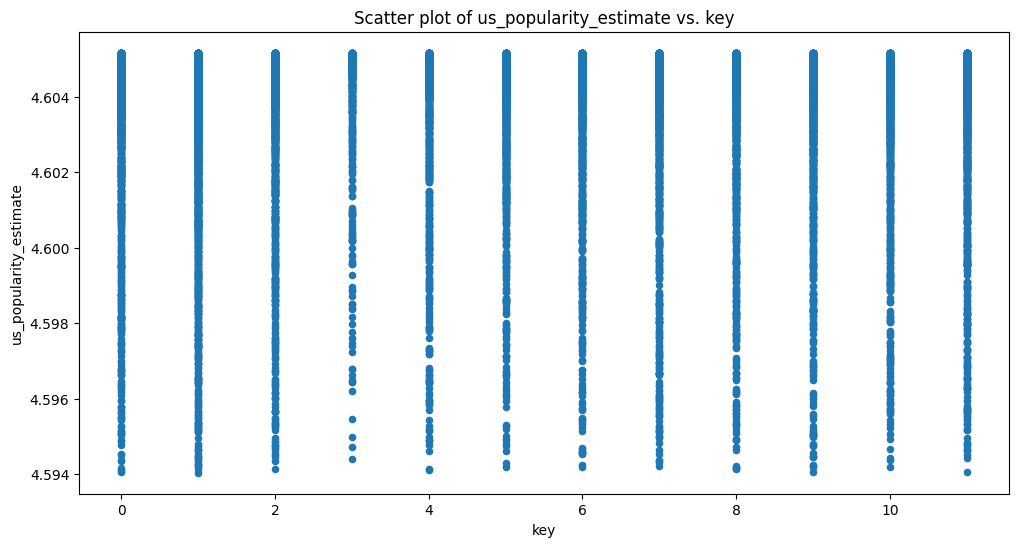

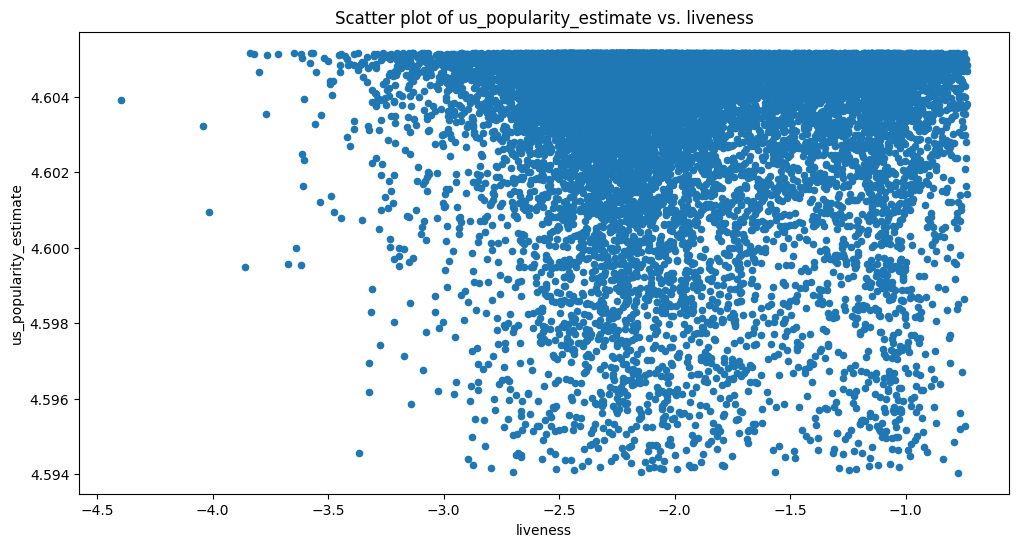

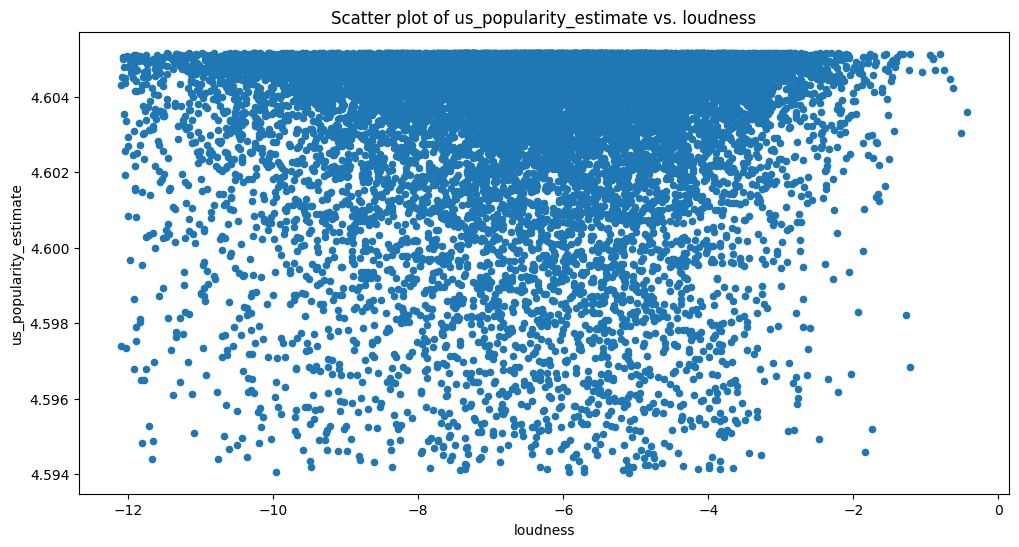

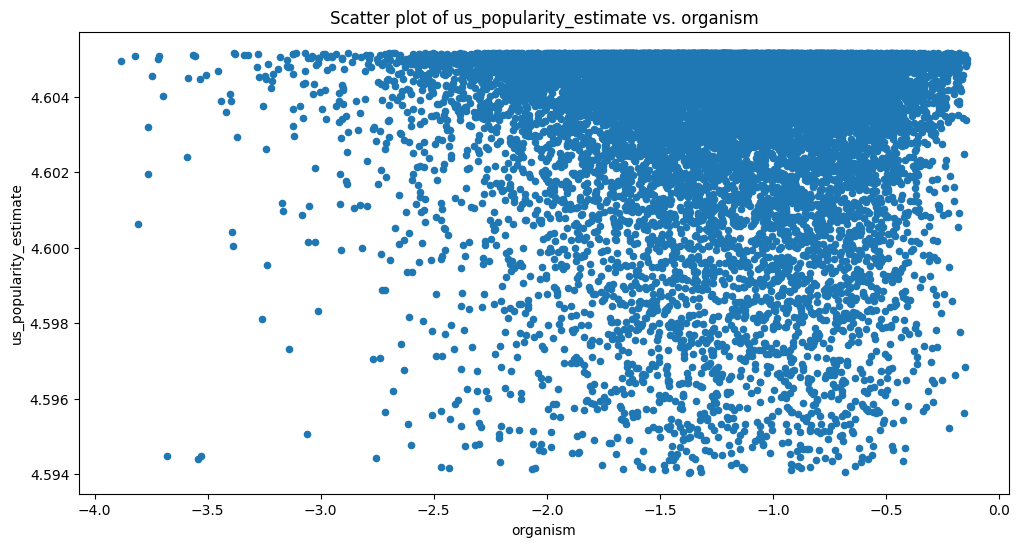

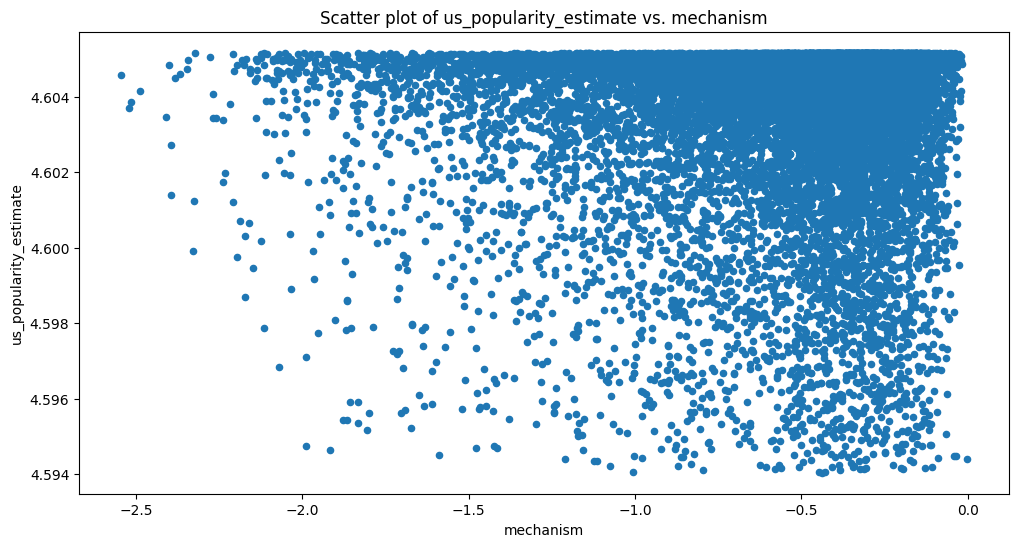

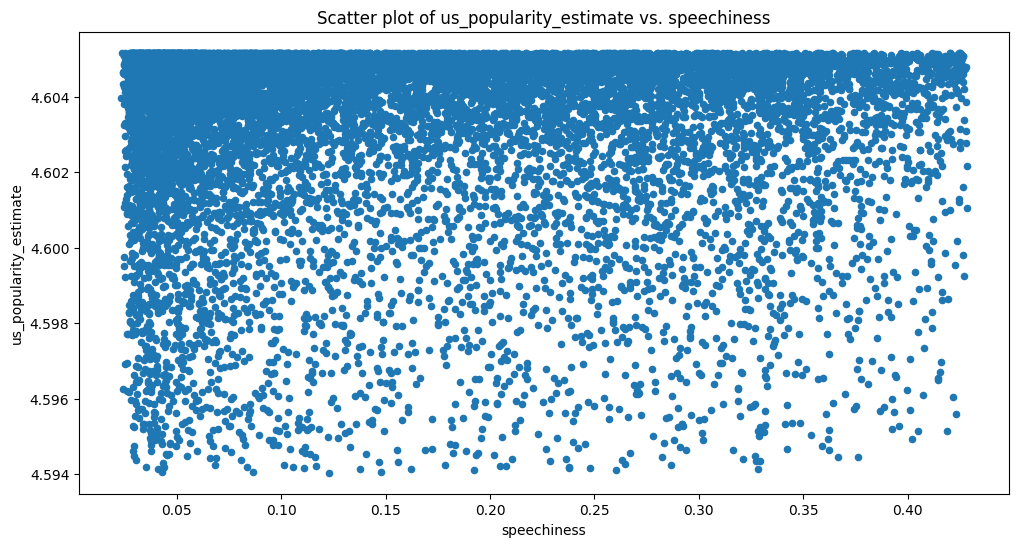

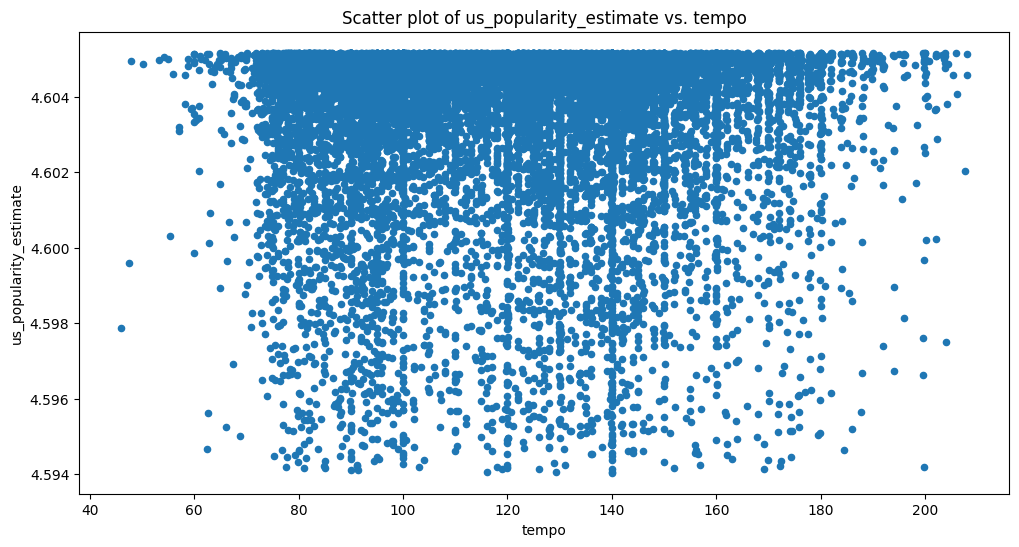

In [ ]:
def plot_scatter(df, cols, col_y = 'us_popularity_estimate'):
    for col in cols:
        fig = plt.figure(figsize=(12,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['acousticness', 'beat_strength', 'bounciness', 'danceability','dyn_range_mean','energy','flatness','instrumentalness','key','liveness','loudness','organism','mechanism','speechiness','tempo']
plot_scatter(df, num_cols)        

**Couldn't find a releation that can help us knowing what makes a track popular**

**What is mode in Music?**

tells us the tonic pitch is “A” and the type of scale is “minor.” Using the same terminology, if we say a piece of music is in “G Mixolydian,” we are saying that the tonic pitch is “G” and the type of scale based on G is “Mixolydian.” Here is a simple melody in the key of C major.


In [ ]:
print(df['mode'].unique())
print("\n")


['major' 'minor']




Text(0, 0.5, 'Count')

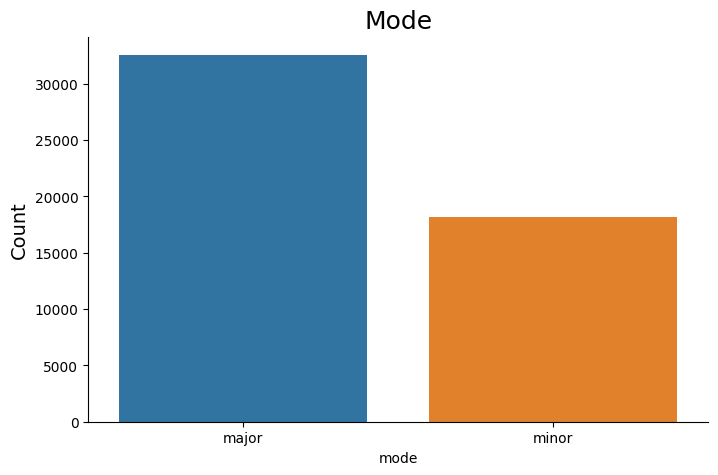

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="mode", data=df)
sns.despine()
plt.title("Mode", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

**Most Songs are Major**

# What is the year having most song releases?

Text(0.5, 1.0, 'Release Year')

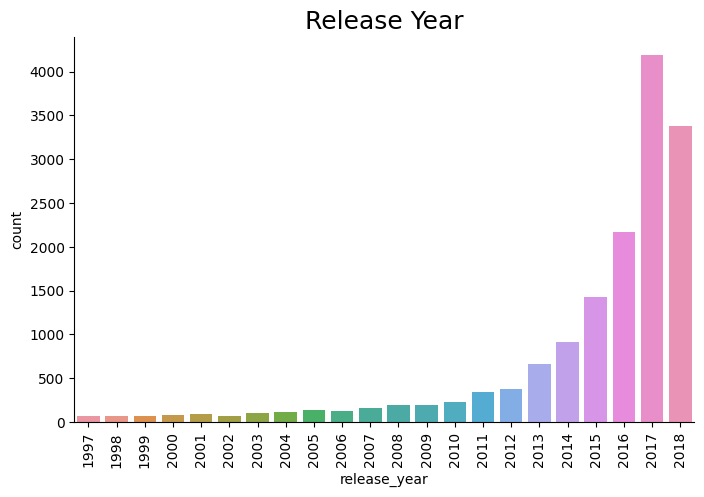

In [ ]:

plt.figure(figsize=(8, 5))
plt.xticks(rotation=90)
sns.countplot(x="release_year", data=df)
sns.despine()
plt.title("Release Year", fontsize = 18)


**2018 having most released songs**

# Releation between features using correlation

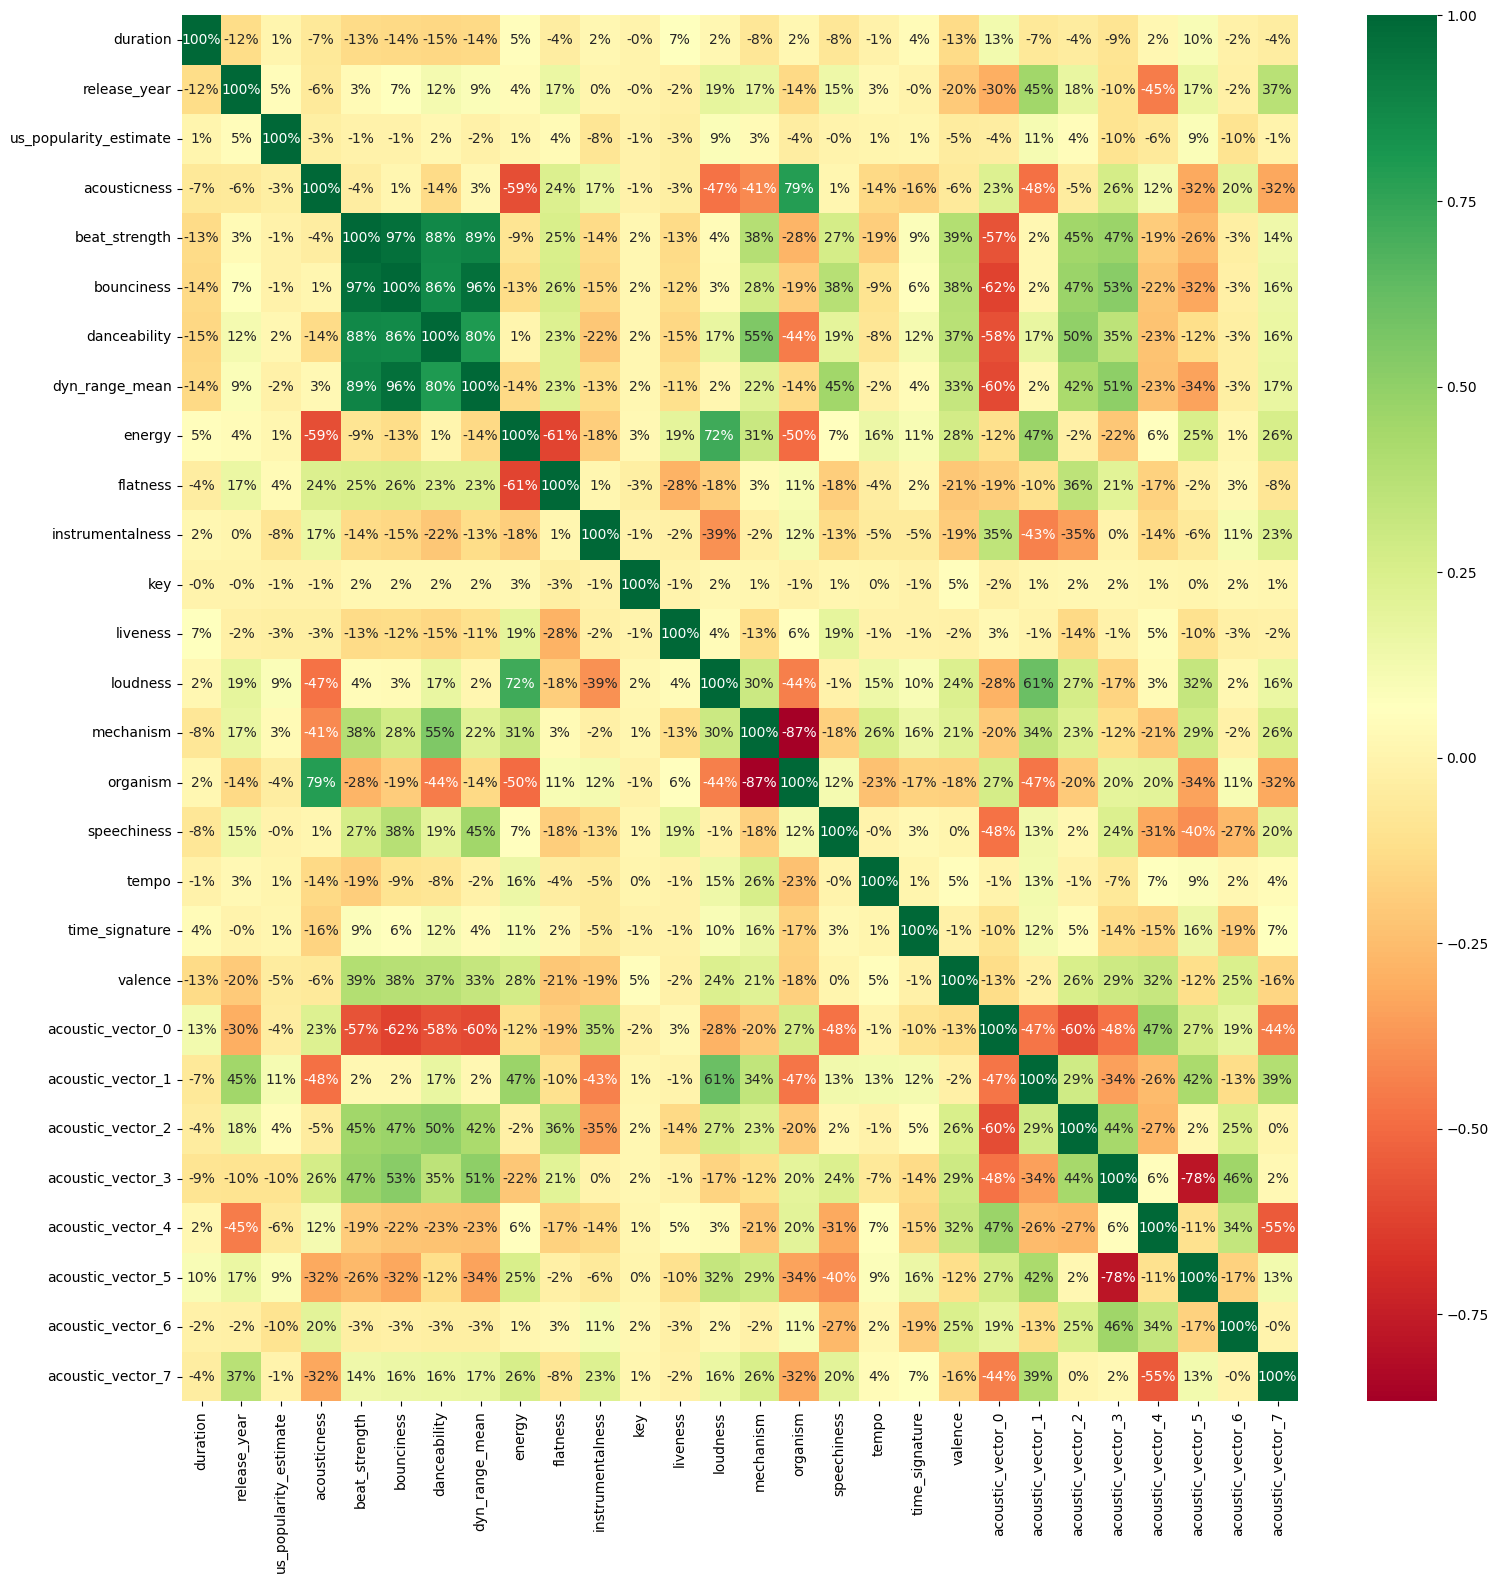

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot = True, fmt='.0%', cmap = "RdYlGn")
plt.show()



*   We can notice that the following features:beat_strength,bounciness,danceability,dyn_range_mean have high corr among each other we can choose to drop some of them and leave the one having the highest corr with target variable.

*   We can see that  acoustic_vectors having varying correlations among each other from neg corr to positive  highest negative corr is between acoustic_vector3 and acoustic_vector5 =-78% and highest pos corr is between acoustic_vector0 and acoustic_vector4.

*   Acoustic_vector0 having negative corr among majority of other features except for instrumentalness and organism wich lead me into conclution that songs that dosen't have instruments in it has higher organism so this means lower mechanism and also the propability that this song is acoustic increases.

*   As we previously concluded us_popularity feature has low corr among other features .

*   Organism and mechanism having high neg corr -87%.

*   Tempo means the speed at which a piece of music should be played so it makes sense that it have highest corr with Mechanism.


*   dynamic range which describes the difference between the quietest and loudest volume of an instrument which allows for louder volume, but can make the recording sound less exciting or live so it does make sense having a neg corr with liveness and a positive with loudness.

*   Speechiness has highest corr with dynamic range .

*   Music valence which Describes the musical positiveness conveyed by a track indeed have the highest corr with beat_strength,bounciness,danceability,dyn_range_mean.   









# let's check on skewness

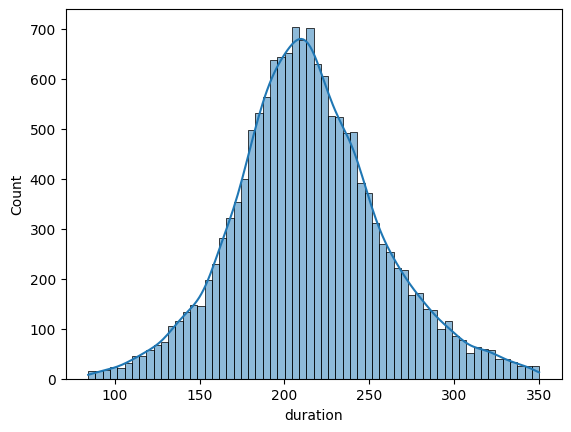

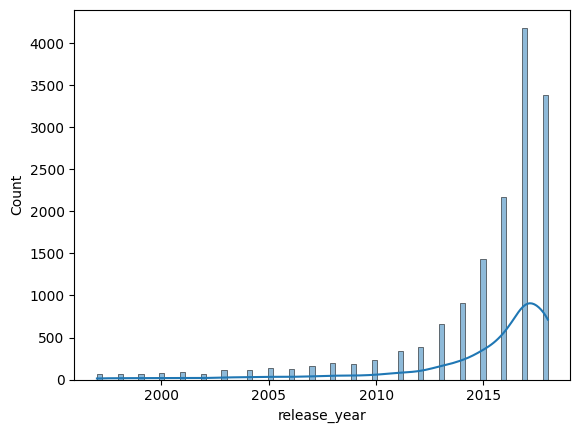

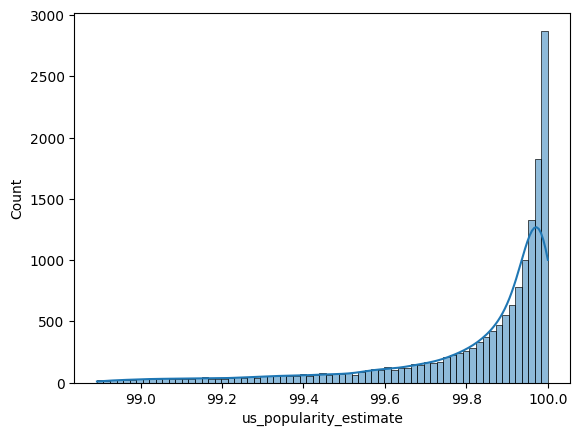

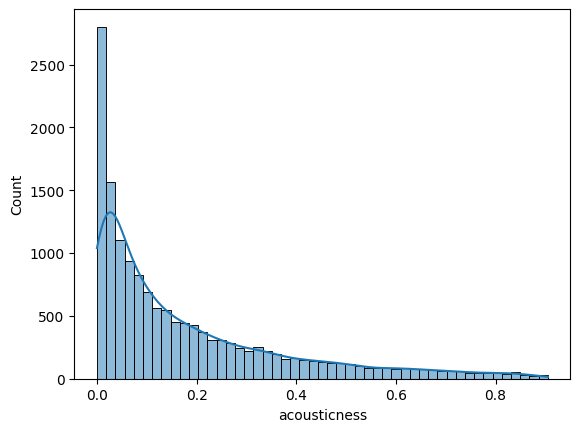

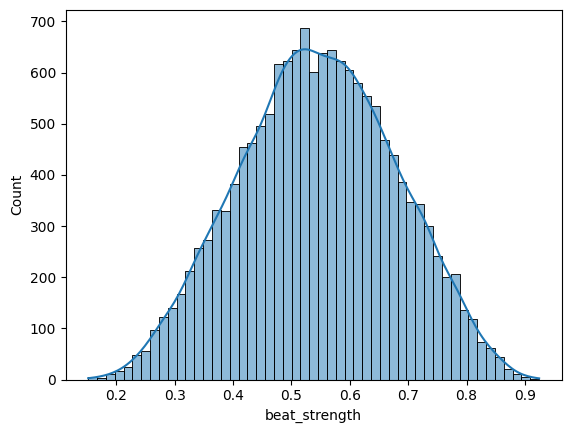

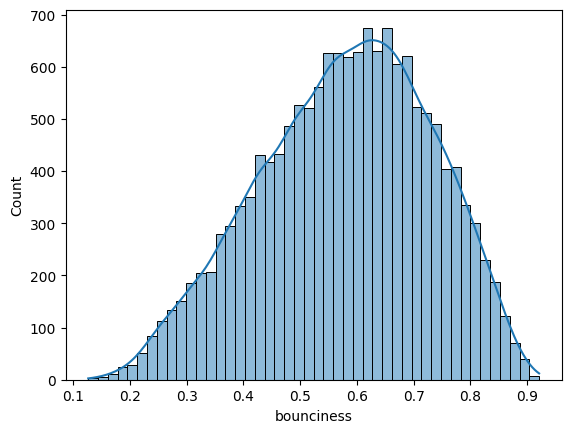

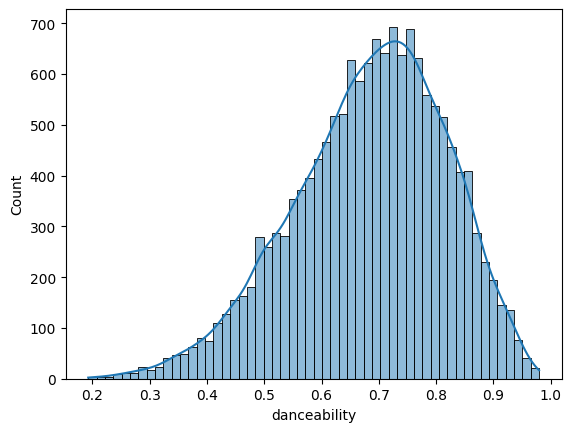

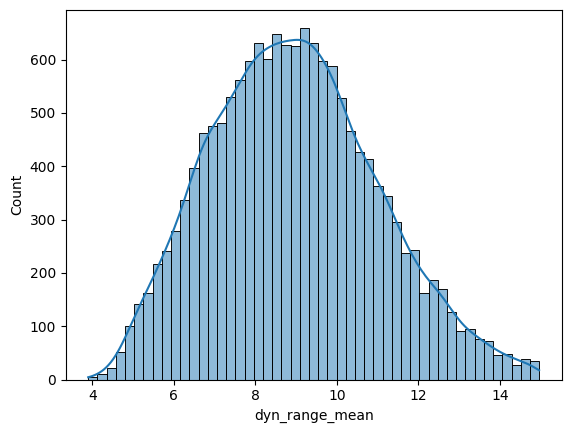

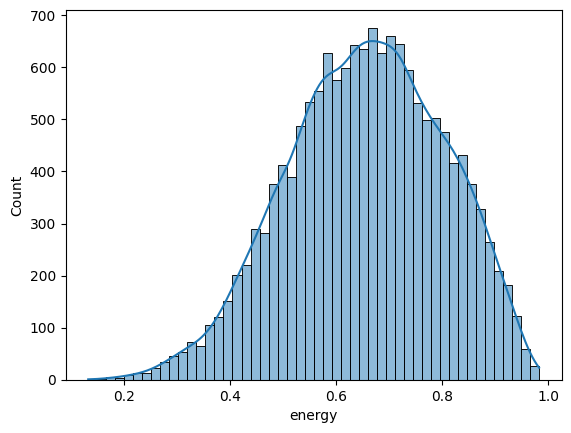

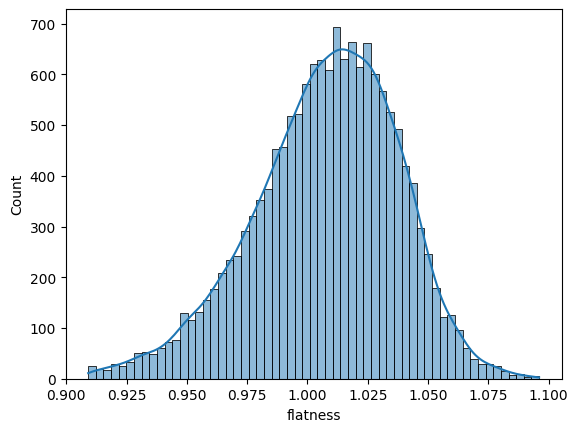

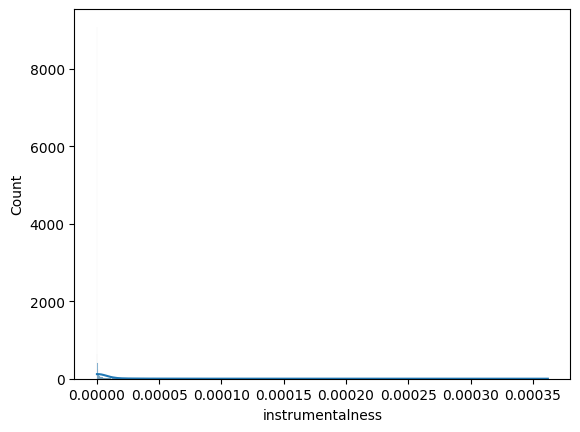

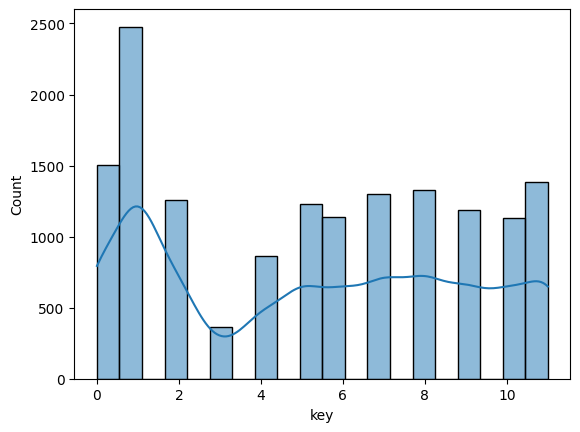

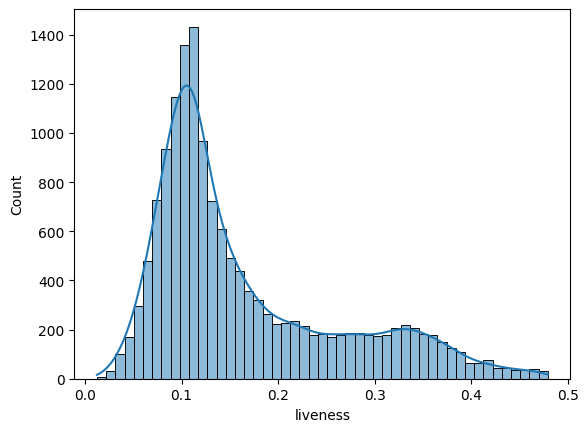

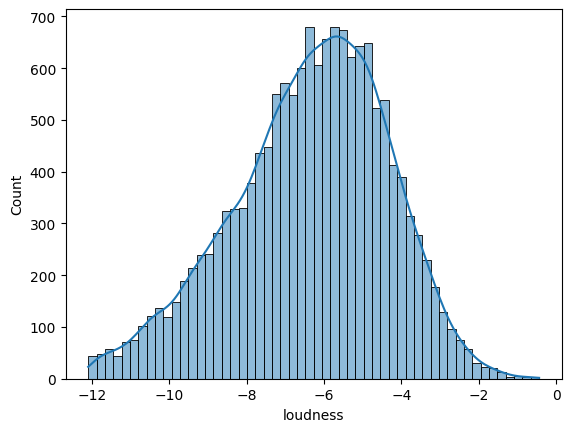

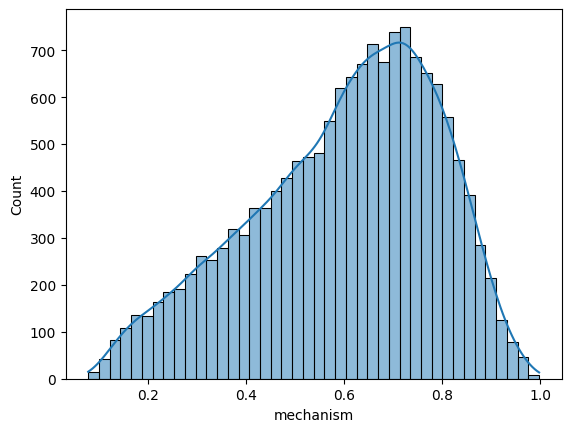

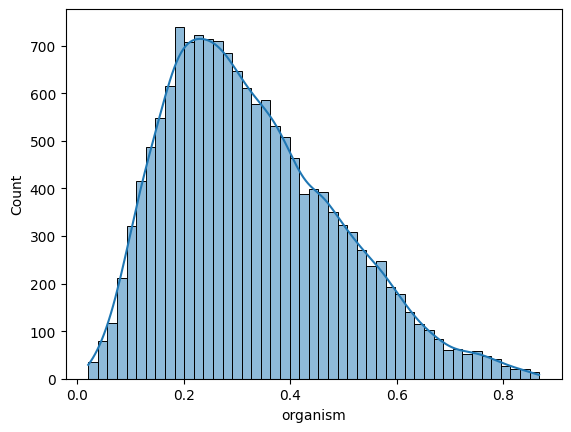

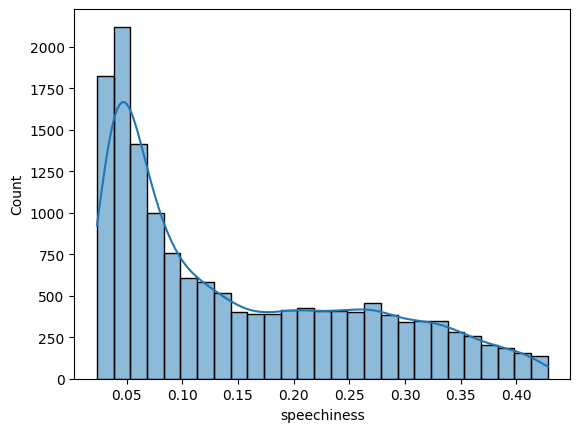

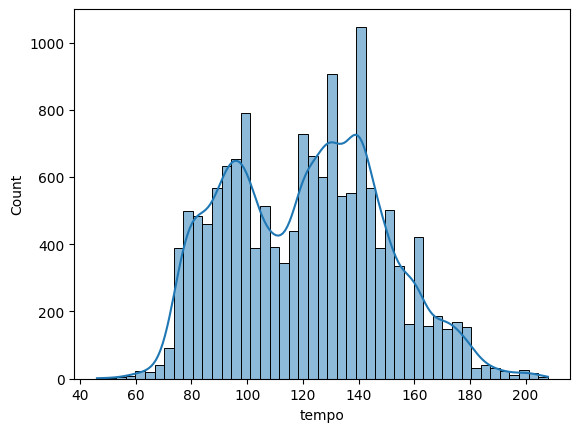

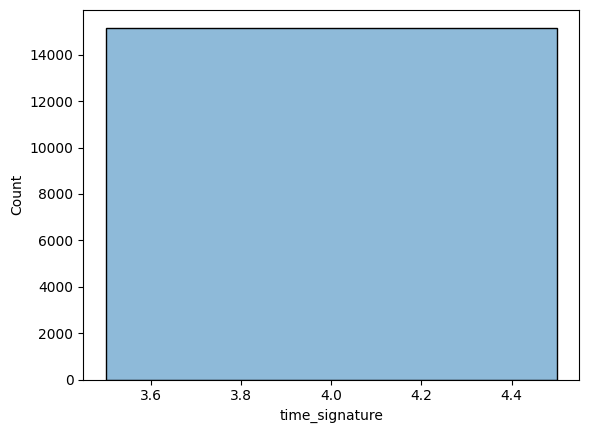

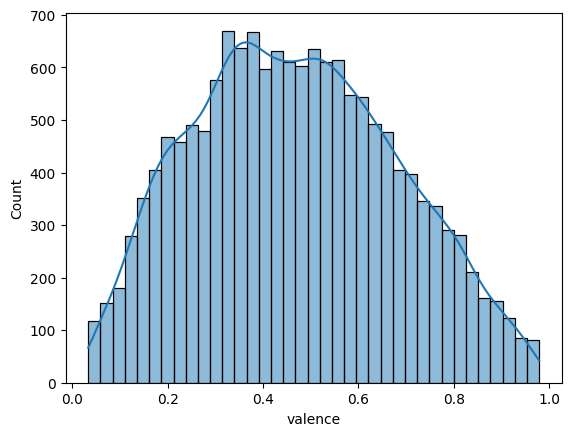

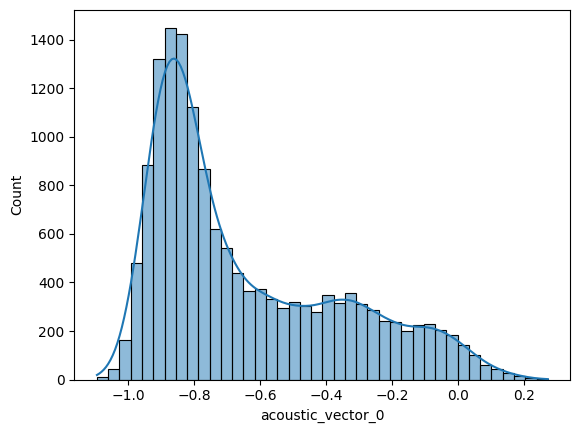

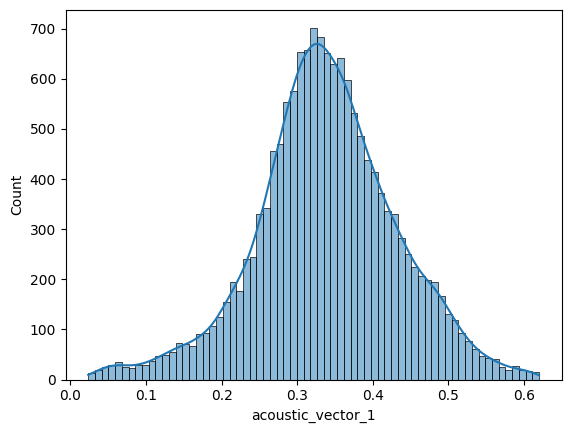

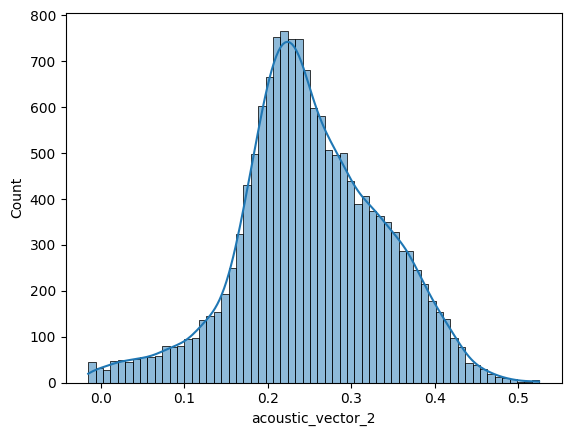

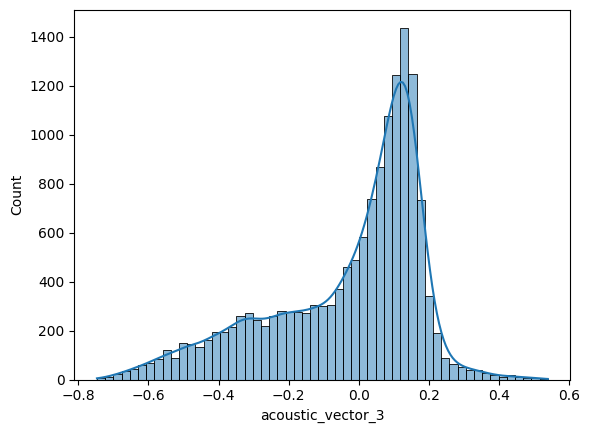

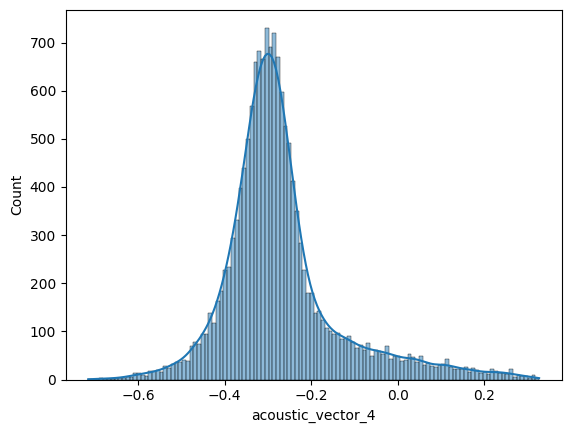

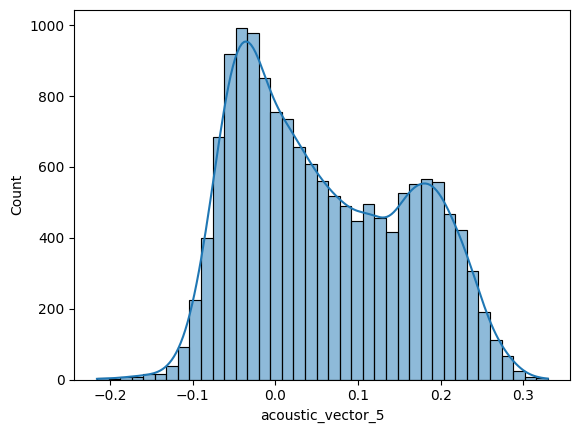

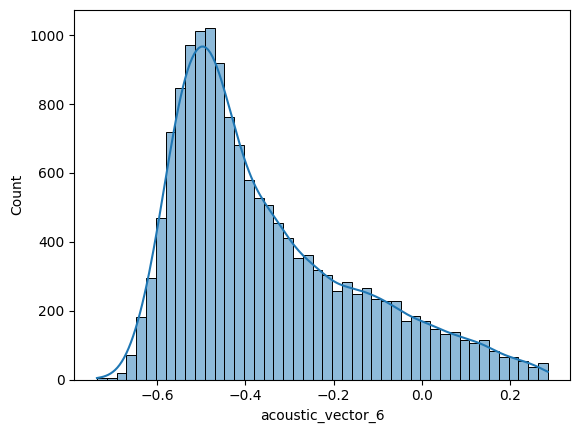

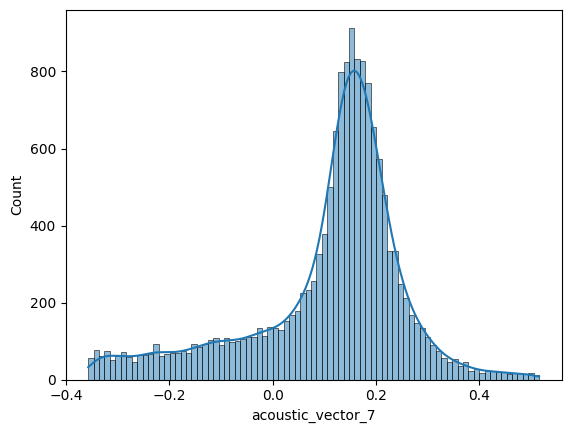

In [ ]:
for col in df_numerical:
    sns.histplot(df[col], kde = True)
    plt.show()



*   Some columns are skewed i will deal with them in feature engineering part.



# Encoding

In [ ]:
preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder() 
# Encode labels 
df['mode']= label_encoder.fit_transform(df['mode'])